In [11]:
import os

# Set up paths using absolute path to project
BASE_DIR = '/Users/aarushburra/Documents/regime-lstm-option-pricing'
RESULTS_DIR = os.path.join(BASE_DIR, 'results')
DATA_DIR = os.path.join(BASE_DIR, 'data')

# Create results folder
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"✓ Base directory: {BASE_DIR}")
print(f"✓ Results directory: {RESULTS_DIR}")
print(f"✓ Data directory: {DATA_DIR}")



✓ Base directory: /Users/aarushburra/Documents/regime-lstm-option-pricing
✓ Results directory: /Users/aarushburra/Documents/regime-lstm-option-pricing/results
✓ Data directory: /Users/aarushburra/Documents/regime-lstm-option-pricing/data


In [13]:
"""
Data Exploration: SPY Options and VIX (2020-2024)
Author: [Your Name]
Date: December 29, 2025

This notebook explores the cleaned SPY/VIX dataset to understand:
1. Price movements over time
2. Regime distribution (low vs high volatility)
3. Relationship between VIX and realized volatility
4. Return distributions by regime
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plot style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Load data
df = pd.read_csv(os.path.join(DATA_DIR, 'spy_vix_combined.csv'), index_col=0, parse_dates=True)

print("Dataset Overview:")
print(f"Date range: {df.index[0]} to {df.index[-1]}")
print(f"Total rows: {len(df)}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
display(df.head())

print(f"\nBasic Statistics:")
display(df.describe())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/aarushburra/Documents/regime-lstm-option-pricing/data/spy_vix_combined.csv'

NameError: name 'df' is not defined

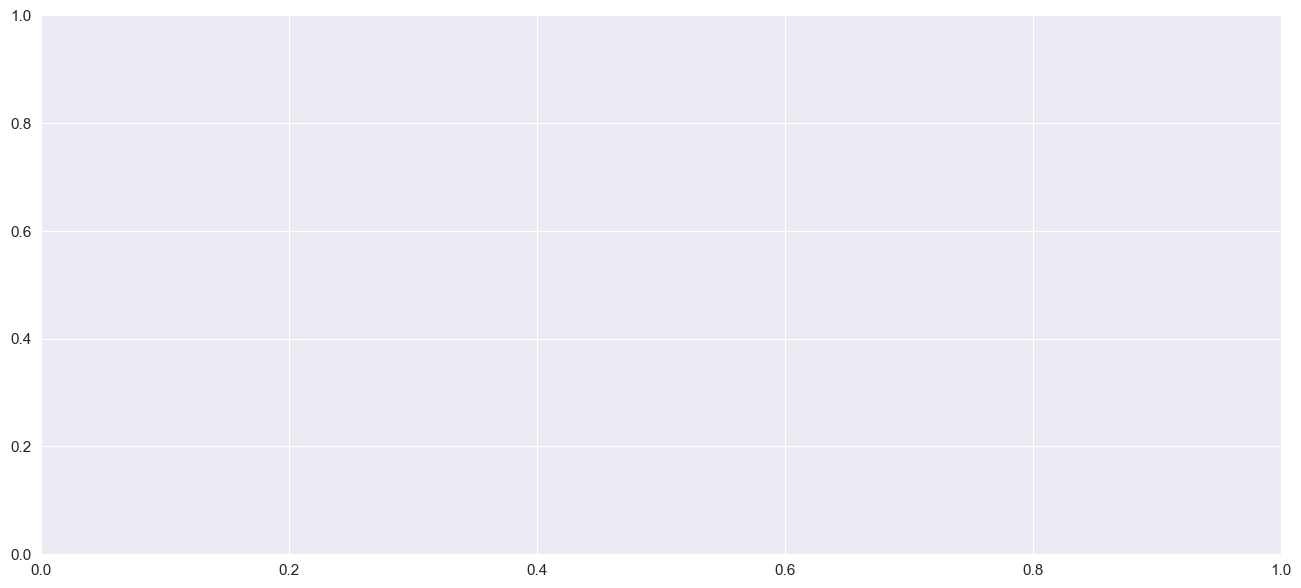

In [14]:
# Plot 1: SPY Price Over Time (Color-coded by Regime)

fig, ax = plt.subplots(figsize=(16, 7))

# Separate data by regime
low_vol = df[df['Regime'] == 'Low']
high_vol = df[df['Regime'] == 'High']

# Plot price with different colors for each regime
ax.plot(low_vol.index, low_vol['Close_SPY'], 'o', markersize=2, 
        color='green', alpha=0.6, label='Low Volatility (VIX < 20)')
ax.plot(high_vol.index, high_vol['Close_SPY'], 'o', markersize=2, 
        color='red', alpha=0.6, label='High Volatility (VIX ≥ 20)')

# Add trend line
ax.plot(df.index, df['Close_SPY'], color='blue', linewidth=1.5, alpha=0.3, label='SPY Close')

ax.set_title('SPY Price Over Time (2020-2024) - Colored by Volatility Regime', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('SPY Close Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
results_dir = os.path.join(os.path.dirname(os.getcwd()), 'results')
plt.savefig(os.path.join(RESULTS_DIR, 'spy_price_by_regime.png'), dpi=150, bbox_inches='tight')


# Debug: Check if file was saved
save_path = os.path.join(RESULTS_DIR, 'spy_price_by_regime.png')
if os.path.exists(save_path):
    print(f"✓ Plot saved successfully to: {save_path}")
else:
    print(f"❌ File NOT saved. Tried to save to: {save_path}")
    print(f"   Current directory: {os.getcwd()}")
    print(f"   Does results folder exist? {os.path.exists(RESULTS_DIR)}")


plt.show()

print("✓ Plot saved to results/spy_price_by_regime.png")


In [ ]:
import os

# Check paths
print("=== DIAGNOSTIC INFO ===")
print(f"Current working directory: {os.getcwd()}")
print(f"RESULTS_DIR variable: {RESULTS_DIR}")
print(f"Does RESULTS_DIR exist? {os.path.exists(RESULTS_DIR)}")

# Try to create it again
os.makedirs(RESULTS_DIR, exist_ok=True)
print(f"Created/verified RESULTS_DIR")

# Test save
test_file = os.path.join(RESULTS_DIR, 'test.txt')
with open(test_file, 'w') as f:
    f.write("test")
print(f"Test file created at: {test_file}")
print(f"Test file exists? {os.path.exists(test_file)}")

# List what's in results folder
print(f"\nContents of results folder:")
if os.path.exists(RESULTS_DIR):
    files = os.listdir(RESULTS_DIR)
    print(f"  Files: {files if files else 'EMPTY'}")
else:
    print("  FOLDER DOESN'T EXIST")


=== DIAGNOSTIC INFO ===
Current working directory: /Users/aarushburra/Documents/regime-lstm-option-pricing/notebooks
RESULTS_DIR variable: /Users/aarushburra/Documents/regime-lstm-option-pricing/results
Does RESULTS_DIR exist? True
Created/verified RESULTS_DIR
Test file created at: /Users/aarushburra/Documents/regime-lstm-option-pricing/results/test.txt
Test file exists? True

Contents of results folder:
  Files: ['test.txt']
